<img src="img\cover.png">

# LEZIONE 2


4 Giugno 2018

### La libreria Scikit-Learn
<img src="img/scikit-learn-logo-small.png">
The scikit-learn project started as scikits.learn, a Google Summer of Code project by David Cournapeau. Its name stems from the notion that it is a "SciKit" (SciPy Toolkit), a separately-developed and distributed third-party extension to SciPy. The original codebase was later rewritten by other developers. In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort and Vincent Michel, all from INRIA took leadership of the project and made the first public release on February the 1st 2010. Of the various scikits, scikit-learn as well as scikit-image were described as "well-maintained and popular" in November 2012.

As of 2018, scikit-learn is under active development.

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

http://scikit-learn.org/stable/index.html

### Definizioni

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

Supervised learning: in which the data comes with additional attributes that we want to predict This problem can be either:

* classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
* regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.



#### Training set and testing set

Machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the training set on which we learn data properties and one that we call the testing set on which we test these properties.

<img src="img/ml_map.png">

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Mini tutorial...



http://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
header = [name + '_' + str(i) for name in ['Ax','Ay','Az','Gx','Gy','Gz'] for i in range(1,21)]+['movement']
data = pd.read_csv('movements.csv', header=None, index_col=0, names=header)
data.head()

,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,Ax_10,...,Gz_12,Gz_13,Gz_14,Gz_15,Gz_16,Gz_17,Gz_18,Gz_19,Gz_20,movement
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-22.458015,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-22.458015,-29.381679,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,-22.458015,-29.381679,-24.106870,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,-22.458015,-29.381679,-24.106870,-14.061069,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-22.458015,-29.381679,-24.106870,-14.061069,-1.458015,1


Assomiglia a:
<img src="img/Features.png">
che è la forma corretta dei dati per essere "digeriti" da un algoritmo IA

### Quindi....
Quanti sono i campioni?

In [2]:
len(data)

751

Ogni campione è marcato con il corrispettivo movimento nella colonna "movement".

Quante sono le features?

In [3]:
len(data.columns) - 1

120

### Seguendo il flowchart

...KNeighbors Classifier!

Il principio dietro tutti gli algortimi a "primi vicini" è di trovare un numero predefinito di training sample vicini al nuovo campione che si vuole classificare. Il numero predefinito di campioni può essere una costante definita dall'utente (k-nearest neighbor leraning) oppure variare in base alla densità dei campioni (radius-based neighbor learning).

I classificatori a primi vicini sono di tipo *instance-based learning* o *non-generalizing learning* perchè non costruiscono alcun modello interno dei dati, ma semplicemente memorizzano le istance dei campioni di training.

La classificazione è semplicemente calcolata tramite una votazione del primo vicino di ciascun punto.

### Esempio Iris con solo due features

<img src="img/iris.jpg">

Il dataset Iris è un dataset multivariato introdotto da Ronald Fisher nel 1936. Consiste in 150 istanze di Iris misurate da Edgar Anderson e classificate secondo tre specie: Iris setosa, Iris virginica e Iris versicolor. Le quattro variabili considerate sono la lunghezza e la larghezza del sepalo e del petalo.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [5]:
n_neighbors = 15
h = .02  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()

In [6]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [8]:
X = iris['data'][:,:2]
y = iris['target']

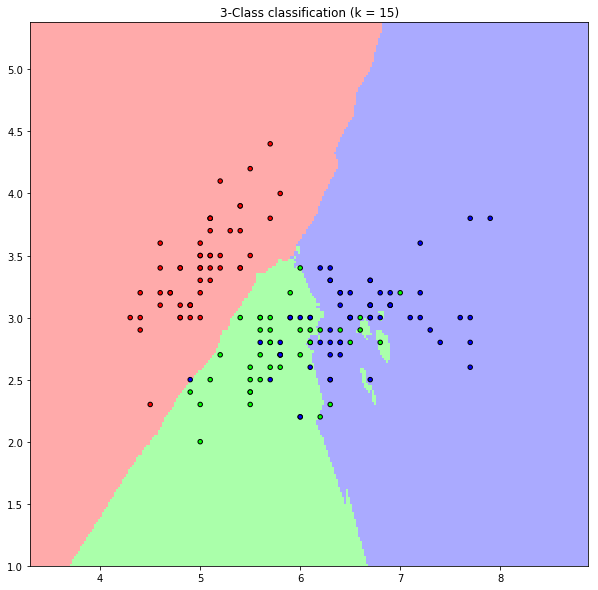

In [11]:
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))

plt.show()

### Proviamo ora con il dataset dei movimenti....

#### Import delle librerie

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

Estraiamo i nomi delle features:

In [13]:
features = [col for col in data.columns.tolist() if col!='movement']
print features

['Ax_1', 'Ax_2', 'Ax_3', 'Ax_4', 'Ax_5', 'Ax_6', 'Ax_7', 'Ax_8', 'Ax_9', 'Ax_10', 'Ax_11', 'Ax_12', 'Ax_13', 'Ax_14', 'Ax_15', 'Ax_16', 'Ax_17', 'Ax_18', 'Ax_19', 'Ax_20', 'Ay_1', 'Ay_2', 'Ay_3', 'Ay_4', 'Ay_5', 'Ay_6', 'Ay_7', 'Ay_8', 'Ay_9', 'Ay_10', 'Ay_11', 'Ay_12', 'Ay_13', 'Ay_14', 'Ay_15', 'Ay_16', 'Ay_17', 'Ay_18', 'Ay_19', 'Ay_20', 'Az_1', 'Az_2', 'Az_3', 'Az_4', 'Az_5', 'Az_6', 'Az_7', 'Az_8', 'Az_9', 'Az_10', 'Az_11', 'Az_12', 'Az_13', 'Az_14', 'Az_15', 'Az_16', 'Az_17', 'Az_18', 'Az_19', 'Az_20', 'Gx_1', 'Gx_2', 'Gx_3', 'Gx_4', 'Gx_5', 'Gx_6', 'Gx_7', 'Gx_8', 'Gx_9', 'Gx_10', 'Gx_11', 'Gx_12', 'Gx_13', 'Gx_14', 'Gx_15', 'Gx_16', 'Gx_17', 'Gx_18', 'Gx_19', 'Gx_20', 'Gy_1', 'Gy_2', 'Gy_3', 'Gy_4', 'Gy_5', 'Gy_6', 'Gy_7', 'Gy_8', 'Gy_9', 'Gy_10', 'Gy_11', 'Gy_12', 'Gy_13', 'Gy_14', 'Gy_15', 'Gy_16', 'Gy_17', 'Gy_18', 'Gy_19', 'Gy_20', 'Gz_1', 'Gz_2', 'Gz_3', 'Gz_4', 'Gz_5', 'Gz_6', 'Gz_7', 'Gz_8', 'Gz_9', 'Gz_10', 'Gz_11', 'Gz_12', 'Gz_13', 'Gz_14', 'Gz_15', 'Gz_16', 'Gz_17', 

Scombiamo a caso l'ordine dei campioni...

In [14]:
data.sample?

In [15]:
shuffled_data = data.sample(frac=1)
shuffled_data.head(10)

,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,Ax_10,...,Gz_12,Gz_13,Gz_14,Gz_15,Gz_16,Gz_17,Gz_18,Gz_19,Gz_20,movement
1.524893e+09,1.000244,0.942139,0.949707,1.032227,1.035889,1.137451,0.971436,0.849121,0.544678,0.344971,...,-6.557252,5.809160,15.778626,26.419847,32.595420,35.374046,37.274809,39.854962,37.854962,1
1.524893e+09,-0.076904,0.083252,0.279785,0.503906,0.786865,1.225098,1.748047,1.999939,1.999939,1.999939,...,-9.412214,-11.603053,-12.305344,-16.198473,-22.893130,-27.450382,-35.061069,-38.450382,-39.564885,3
1.524893e+09,0.851318,0.929443,1.024170,0.994385,1.081299,1.216064,1.049805,0.902588,0.994629,1.168701,...,-6.702290,-7.725191,-7.465649,-6.519084,-5.587786,-5.030534,-4.190840,-3.007634,-1.854962,5
1.524893e+09,0.851318,0.894775,0.880615,0.911133,0.954590,0.909668,0.937500,1.016602,1.303467,1.418945,...,-0.343511,-2.763359,-4.381679,-6.526718,-7.954198,-7.740458,-6.839695,-6.083969,-5.702290,5
1.524893e+09,1.093018,1.089600,1.084717,1.098877,1.083984,1.176514,1.288086,1.328125,1.269287,1.171387,...,-0.145038,2.374046,5.099237,7.656489,8.656489,9.328244,10.374046,11.015267,9.198473,4
1.524893e+09,0.417969,0.373047,0.265625,0.007080,0.082520,0.128662,-0.130371,-0.205566,-0.119141,0.048096,...,12.343511,16.137405,14.557252,16.961832,18.496183,7.251908,0.801527,-2.961832,-5.244275,2
1.524893e+09,0.000000,0.000000,0.000000,1.152588,1.562988,1.999939,1.999939,1.999939,1.938477,1.689941,...,-10.977099,-17.435115,-23.984733,-29.007634,-35.893130,-40.198473,-41.961832,-43.343511,-42.396947,3
1.524893e+09,1.529785,1.305908,0.923096,0.713379,0.473633,0.306641,0.081055,-0.125732,-0.159912,0.027588,...,38.213740,42.145038,43.786260,48.305344,49.503817,52.213740,44.480916,14.183206,-12.229008,3
1.524893e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,48.564885,45.045802,45.580153,46.977099,3
1.524893e+09,1.136230,1.099365,1.202393,1.277100,1.259521,1.262451,1.244385,1.181885,1.116943,1.070312,...,5.625954,7.587786,9.564885,9.893130,9.854962,9.916031,8.648855,5.687023,1.656489,4


** Ora proviamo a costruire un classificatore a primi vicini! **

In fase di sviluppo è buona norma suddividere il dataset in due parti il più possibile scorrelate tra di loro:
* training data
* test data

Questa situazione emula la situazione reale del sistema in produzione in cui si ha la suddivisione:
* dati in-sample: dati usati per fare il training dell'algortimo una volta per tutte
* dati out-of-sample: dati reali che stimolano l'algoritmo nei casi non noti

In [17]:
n_of_train_samples = 500
n_of_test_samples = len(data) - n_of_train_samples

train_data = shuffled_data.iloc[0:n_of_train_samples]
test_data = shuffled_data.iloc[n_of_train_samples:len(shuffled_data)]

print "N of train samples = %i,  N of test samples = %i"%(n_of_train_samples, n_of_test_samples)

N of train samples = 500,  N of test samples = 251


In [18]:
test_data.head()

,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,Ax_10,...,Gz_12,Gz_13,Gz_14,Gz_15,Gz_16,Gz_17,Gz_18,Gz_19,Gz_20,movement
1.524893e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.342041,...,-14.061069,-1.458015,11.946565,22.748092,29.832061,34.969466,39.053435,36.984733,37.717557,1
1.524893e+09,0.000000,0.000000,-0.020996,0.238037,0.427246,0.456787,0.688721,0.957275,1.060303,1.085449,...,2.083969,-0.679389,-4.770992,-9.916031,-11.480916,-12.091603,-14.885496,-14.946565,-14.290076,2
1.524893e+09,1.174072,1.170898,1.184326,1.184082,1.217285,1.272217,1.270264,1.162598,1.096436,1.100098,...,7.748092,9.183206,9.954198,10.183206,10.809160,9.167939,5.610687,2.198473,-0.748092,4
1.524893e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.648855,0.717557,-1.396947,-3.335878,-4.847328,-5.404580,-5.793893,-6.496183,-7.465649,5
1.524893e+09,1.043213,1.024902,0.981689,0.947266,0.923096,0.903076,0.931152,0.937500,0.987061,1.006592,...,9.725191,9.816794,9.648855,10.061069,9.893130,7.488550,5.923664,5.381679,4.007634,5


### Creazione dei dataset di test e di training


In [19]:
features

['Ax_1',
 'Ax_2',
 'Ax_3',
 'Ax_4',
 'Ax_5',
 'Ax_6',
 'Ax_7',
 'Ax_8',
 'Ax_9',
 'Ax_10',
 'Ax_11',
 'Ax_12',
 'Ax_13',
 'Ax_14',
 'Ax_15',
 'Ax_16',
 'Ax_17',
 'Ax_18',
 'Ax_19',
 'Ax_20',
 'Ay_1',
 'Ay_2',
 'Ay_3',
 'Ay_4',
 'Ay_5',
 'Ay_6',
 'Ay_7',
 'Ay_8',
 'Ay_9',
 'Ay_10',
 'Ay_11',
 'Ay_12',
 'Ay_13',
 'Ay_14',
 'Ay_15',
 'Ay_16',
 'Ay_17',
 'Ay_18',
 'Ay_19',
 'Ay_20',
 'Az_1',
 'Az_2',
 'Az_3',
 'Az_4',
 'Az_5',
 'Az_6',
 'Az_7',
 'Az_8',
 'Az_9',
 'Az_10',
 'Az_11',
 'Az_12',
 'Az_13',
 'Az_14',
 'Az_15',
 'Az_16',
 'Az_17',
 'Az_18',
 'Az_19',
 'Az_20',
 'Gx_1',
 'Gx_2',
 'Gx_3',
 'Gx_4',
 'Gx_5',
 'Gx_6',
 'Gx_7',
 'Gx_8',
 'Gx_9',
 'Gx_10',
 'Gx_11',
 'Gx_12',
 'Gx_13',
 'Gx_14',
 'Gx_15',
 'Gx_16',
 'Gx_17',
 'Gx_18',
 'Gx_19',
 'Gx_20',
 'Gy_1',
 'Gy_2',
 'Gy_3',
 'Gy_4',
 'Gy_5',
 'Gy_6',
 'Gy_7',
 'Gy_8',
 'Gy_9',
 'Gy_10',
 'Gy_11',
 'Gy_12',
 'Gy_13',
 'Gy_14',
 'Gy_15',
 'Gy_16',
 'Gy_17',
 'Gy_18',
 'Gy_19',
 'Gy_20',
 'Gz_1',
 'Gz_2',
 'Gz_3',
 'Gz_4',
 'Gz_5',


In [20]:
X_train = train_data[features].values
X_test = test_data[features].values

y_train = train_data['movement'].values
y_test = test_data['movement'].values

### Standardizzare le feature rimuovendo la media e scalando a varianza unitaria

In [21]:
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [22]:
X_train_scaled

array([[ 0.24314843,  0.11527385,  0.12495323, ...,  1.61699941,
         1.74471743,  1.69975866],
       [-1.76794561, -1.49169961, -1.13484941, ..., -1.60961864,
        -1.76865136, -1.83041332],
       [-0.03490401,  0.09152098,  0.26498231, ..., -0.23261955,
        -0.17842214, -0.11092509],
       ..., 
       [-0.81892073, -1.27929408, -1.64216789, ..., -0.56324915,
        -0.59558759, -0.76495715],
       [ 0.04076272,  0.03396593,  0.00374773, ...,  0.14602115,
         0.11681318,  0.11497529],
       [ 0.54809446,  0.47750522,  0.32191217, ...,  0.40310184,
         0.40040348,  0.31511815]])

### Creiamo l'algoritmo

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [23]:
n_neighbors = 20
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

Utilizzando questo modello calcoliamo la percentuale di movimenti classificati correttamente all'interno del test dataset...

In [24]:
clf.score(X_test_scaled, y_test)

0.952191235059761

## Funziona!

In [25]:
y_test

array([1, 2, 4, 5, 5, 1, 3, 4, 4, 4, 1, 5, 4, 3, 1, 5, 2, 5, 4, 1, 1, 5, 1,
       5, 2, 5, 1, 1, 4, 4, 1, 2, 4, 5, 4, 4, 4, 4, 4, 3, 1, 5, 4, 5, 3, 3,
       1, 3, 4, 5, 4, 3, 3, 5, 3, 2, 3, 1, 5, 2, 1, 1, 5, 4, 5, 5, 1, 2, 3,
       5, 5, 5, 5, 3, 4, 1, 4, 3, 2, 5, 1, 4, 2, 3, 1, 5, 5, 4, 4, 1, 2, 1,
       5, 1, 3, 5, 1, 5, 1, 1, 4, 4, 3, 3, 3, 1, 1, 5, 1, 4, 4, 4, 4, 3, 5,
       4, 1, 2, 5, 1, 4, 2, 5, 3, 3, 5, 1, 4, 3, 3, 1, 2, 3, 4, 3, 5, 1, 1,
       4, 4, 4, 1, 5, 3, 4, 4, 1, 1, 4, 3, 2, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3,
       2, 5, 5, 4, 4, 4, 1, 5, 3, 4, 1, 3, 5, 4, 4, 4, 4, 4, 1, 4, 1, 1, 3,
       5, 4, 4, 4, 5, 1, 4, 5, 4, 1, 3, 5, 4, 5, 3, 5, 4, 3, 5, 1, 3, 1, 1,
       4, 3, 5, 4, 3, 4, 1, 4, 1, 5, 4, 3, 3, 1, 3, 4, 4, 3, 3, 1, 1, 3, 4,
       4, 3, 5, 4, 1, 2, 4, 4, 1, 4, 5, 3, 5, 4, 2, 5, 1, 5, 5, 1, 4])

In [26]:
clf.predict(X_test_scaled)

array([1, 2, 4, 4, 5, 1, 3, 4, 4, 4, 1, 5, 4, 3, 1, 5, 2, 5, 4, 1, 1, 5, 1,
       5, 4, 5, 1, 1, 4, 4, 1, 2, 4, 5, 4, 4, 4, 4, 4, 3, 1, 5, 4, 5, 3, 3,
       1, 3, 4, 5, 4, 3, 3, 5, 3, 4, 3, 1, 5, 4, 1, 1, 5, 4, 5, 5, 1, 4, 3,
       5, 5, 5, 5, 3, 4, 1, 4, 3, 2, 5, 1, 4, 2, 3, 1, 5, 5, 4, 4, 1, 2, 1,
       5, 1, 3, 5, 1, 5, 1, 1, 4, 4, 3, 3, 3, 1, 1, 5, 1, 4, 4, 4, 4, 3, 5,
       4, 1, 4, 5, 1, 4, 2, 5, 3, 3, 5, 1, 4, 3, 3, 1, 2, 3, 4, 3, 5, 1, 1,
       4, 4, 4, 1, 5, 3, 4, 4, 1, 1, 4, 3, 2, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3,
       4, 5, 5, 4, 4, 4, 1, 5, 3, 4, 1, 3, 5, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4,
       5, 4, 4, 4, 4, 1, 4, 4, 4, 1, 3, 5, 4, 5, 3, 5, 4, 3, 5, 1, 3, 1, 4,
       4, 3, 5, 4, 3, 4, 1, 4, 1, 5, 4, 3, 3, 1, 3, 4, 4, 3, 3, 1, 1, 3, 4,
       4, 3, 5, 4, 1, 2, 4, 4, 1, 4, 5, 3, 5, 4, 4, 5, 1, 5, 5, 1, 4])

### Ricreiamo lo stesso algoritmo ma...

Con sole due feature scelte a caso tra le 120: la 3 e la 106

In [27]:
X_train_scaled_reduced = X_train_scaled[:,[3,106]]
X_test_scaled_reduced = X_test_scaled[:,[3,106]]

In [28]:
n_neighbors = 20
clf_reduced = neighbors.KNeighborsClassifier(n_neighbors)
clf_reduced.fit(X_train_scaled_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [29]:
clf_reduced.score(X_test_scaled_reduced, y_test)

0.60956175298804782

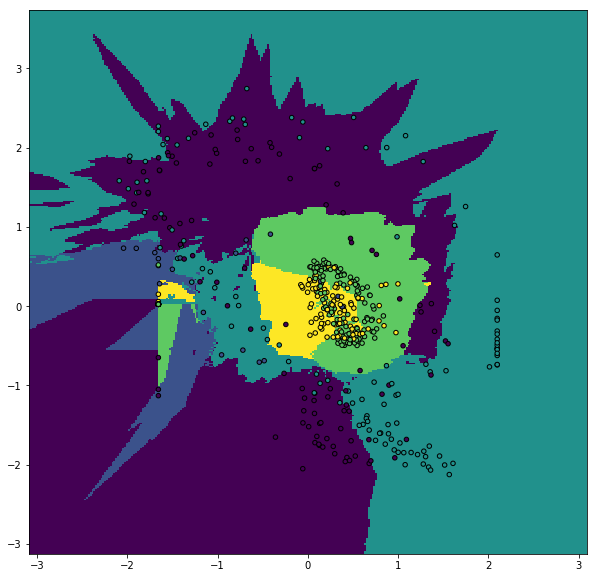

In [30]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#0FF000', '#000FF0'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_scaled_reduced[:, 0].min() - 1, X_train_scaled_reduced[:, 0].max() + 1
y_min, y_max = X_train_scaled_reduced[:, 1].min() - 1, X_train_scaled_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_reduced.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X_train_scaled_reduced[:, 0], X_train_scaled_reduced[:, 1], c=y_train-1, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### Passiamo ad un algortimo più sofisticato: Random Forest!

Si tratta di un algoritmo di tipo ensemble: l'idea è di combinare le predizioni di molti estimatori semplici in modo da migliorare la robustezza e la la capacità di generalizzare.

Consideriamo la famiglia * averaging ensembe methods *, ovvero quegli algoritmi in cui si costruiscono tanti singoli modelli indipendenti e poi di prende la media delle loro predizioni!

Notebook: *WhatAreRandomForest.ipynb*

In [186]:
### Applichiamo Random Forest ai movimenti

In [31]:
header = [name + '_' + str(i) for name in ['Ax','Ay','Az','Gx','Gy','Gz'] for i in range(1,21)]+['movement']
data = pd.read_csv('movements.csv', header=None, index_col=0, names=header)
data.head()

,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,Ax_10,...,Gz_12,Gz_13,Gz_14,Gz_15,Gz_16,Gz_17,Gz_18,Gz_19,Gz_20,movement
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-22.458015,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,-22.458015,-29.381679,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,-22.458015,-29.381679,-24.106870,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,-22.458015,-29.381679,-24.106870,-14.061069,1
1.524893e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-22.458015,-29.381679,-24.106870,-14.061069,-1.458015,1


In [32]:
from sklearn.ensemble import RandomForestClassifier

Estraiamo i nomi delle features:

In [33]:
features = [col for col in data.columns.tolist() if col!='movement']
print features

['Ax_1', 'Ax_2', 'Ax_3', 'Ax_4', 'Ax_5', 'Ax_6', 'Ax_7', 'Ax_8', 'Ax_9', 'Ax_10', 'Ax_11', 'Ax_12', 'Ax_13', 'Ax_14', 'Ax_15', 'Ax_16', 'Ax_17', 'Ax_18', 'Ax_19', 'Ax_20', 'Ay_1', 'Ay_2', 'Ay_3', 'Ay_4', 'Ay_5', 'Ay_6', 'Ay_7', 'Ay_8', 'Ay_9', 'Ay_10', 'Ay_11', 'Ay_12', 'Ay_13', 'Ay_14', 'Ay_15', 'Ay_16', 'Ay_17', 'Ay_18', 'Ay_19', 'Ay_20', 'Az_1', 'Az_2', 'Az_3', 'Az_4', 'Az_5', 'Az_6', 'Az_7', 'Az_8', 'Az_9', 'Az_10', 'Az_11', 'Az_12', 'Az_13', 'Az_14', 'Az_15', 'Az_16', 'Az_17', 'Az_18', 'Az_19', 'Az_20', 'Gx_1', 'Gx_2', 'Gx_3', 'Gx_4', 'Gx_5', 'Gx_6', 'Gx_7', 'Gx_8', 'Gx_9', 'Gx_10', 'Gx_11', 'Gx_12', 'Gx_13', 'Gx_14', 'Gx_15', 'Gx_16', 'Gx_17', 'Gx_18', 'Gx_19', 'Gx_20', 'Gy_1', 'Gy_2', 'Gy_3', 'Gy_4', 'Gy_5', 'Gy_6', 'Gy_7', 'Gy_8', 'Gy_9', 'Gy_10', 'Gy_11', 'Gy_12', 'Gy_13', 'Gy_14', 'Gy_15', 'Gy_16', 'Gy_17', 'Gy_18', 'Gy_19', 'Gy_20', 'Gz_1', 'Gz_2', 'Gz_3', 'Gz_4', 'Gz_5', 'Gz_6', 'Gz_7', 'Gz_8', 'Gz_9', 'Gz_10', 'Gz_11', 'Gz_12', 'Gz_13', 'Gz_14', 'Gz_15', 'Gz_16', 'Gz_17', 

Scombiamo a caso l'ordine dei campioni...

In [34]:
shuffled_data = data.sample(frac=1)
shuffled_data.head(10)

,Ax_1,Ax_2,Ax_3,Ax_4,Ax_5,Ax_6,Ax_7,Ax_8,Ax_9,Ax_10,...,Gz_12,Gz_13,Gz_14,Gz_15,Gz_16,Gz_17,Gz_18,Gz_19,Gz_20,movement
1.524893e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.816794,2.648855,0.717557,-1.396947,-3.335878,5
1.524893e+09,-0.119141,0.048096,0.230713,0.518311,0.661377,0.799561,1.241455,1.398926,1.328125,0.726562,...,-5.244275,-10.167939,-11.832061,-13.885496,-16.435115,-15.328244,-15.183206,-15.977099,-15.053435,2
1.524893e+09,1.311768,1.523438,1.599121,1.566650,1.530273,1.425781,1.227295,0.933105,0.642334,0.333008,...,-4.381679,4.358779,12.106870,21.145038,30.488550,37.778626,43.709924,46.061069,49.137405,3
1.524893e+09,1.302246,1.143799,1.148682,1.192627,1.073242,0.956299,0.990967,0.975342,1.016113,0.958740,...,-4.007634,-2.618321,-0.847328,0.106870,0.641221,1.526718,2.435115,1.671756,-0.648855,5
1.524893e+09,0.624268,0.407959,0.202393,-0.019287,-0.115967,-0.002197,0.120605,0.335693,0.548096,0.668457,...,41.053435,41.412214,40.083969,26.229008,13.160305,-2.816794,-13.053435,-21.320611,-28.068702,1
1.524893e+09,1.418945,1.302246,1.143799,1.148682,1.192627,1.073242,0.956299,0.990967,0.975342,1.016113,...,-5.175573,-4.007634,-2.618321,-0.847328,0.106870,0.641221,1.526718,2.435115,1.671756,5
1.524893e+09,0.923096,0.903076,0.931152,0.937500,0.987061,1.006592,1.037354,1.069336,1.105225,1.148926,...,9.893130,7.488550,5.923664,5.381679,4.007634,2.549618,1.282443,-0.305344,-1.740458,5
1.524893e+09,1.062988,1.065674,1.047363,1.049316,1.002686,0.976318,0.926758,0.983398,1.018799,1.009033,...,0.229008,-2.778626,-5.297710,-7.389313,-9.129771,-9.648855,-8.610687,-7.725191,-7.778626,4
1.524893e+09,0.249023,0.521973,0.852539,1.500244,1.743408,1.999939,1.999939,1.988037,1.604248,1.273438,...,-17.824427,-20.534351,-31.038168,-40.145038,-42.320611,-42.946565,-40.030534,-34.160305,-25.961832,3
1.524893e+09,0.988525,1.083984,1.166748,1.071289,0.963379,1.070312,1.188232,1.205078,1.139893,1.104736,...,-8.412214,-9.145038,-8.671756,-7.572519,-6.297710,-5.160305,-3.763359,-1.916031,-0.091603,5


** Ora proviamo a costruire un classificatore Random Forest! **

Essendo nella fase di sviluppo del modello per prima cosa occorre separare i dati in:
* training data
* test data

In [35]:
n_of_train_samples = 500
n_of_test_samples = len(data) - n_of_train_samples

train_data = shuffled_data.iloc[0:n_of_train_samples]
test_data = shuffled_data.iloc[n_of_train_samples:len(shuffled_data)]

print "N of train samples = %i,  N of test samples = %i"%(n_of_train_samples, n_of_test_samples)

N of train samples = 500,  N of test samples = 251


### Creazione dei dataset di test e di training

In [36]:
X_train = train_data[features].values
X_test = test_data[features].values

y_train = train_data['movement'].values
y_test = test_data['movement'].values

### Creiamo l'algoritmo

In [37]:
max_depth=3
n_estimators=100
clf = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Utilizzando questo modello calcoliamo la percentuale di movimenti classificati correttamente all'interno del test dataset...

In [38]:
clf.score(X_test, y_test)

0.89641434262948205

## Funziona!

In [39]:
features_importance = pd.DataFrame(index = features,
                                   data={'Importance':clf.feature_importances_})
features_importance.sort_values('Importance',ascending=False)

,Importance
Az_16,0.052007
Az_20,0.050889
Az_13,0.043301
Az_18,0.041717
Az_8,0.039683
Az_7,0.035301
Az_17,0.031194
Az_1,0.029514
Az_14,0.028910
Az_9,0.026587


### Ricreiamo lo stesso algoritmo ma...

Con le sole due feature più rilevanti: Az_20 e Az_16

In [40]:
X_train_reduced = train_data[['Az_20','Az_16']].values
X_test_reduced = test_data[['Az_20','Az_16']].values

y_train = train_data['movement'].values
y_test = test_data['movement'].values

In [41]:
max_depth=3
n_estimators=100
clf_reduced = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=0)
clf_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
clf_reduced.score(X_test_reduced, y_test)

0.67330677290836649

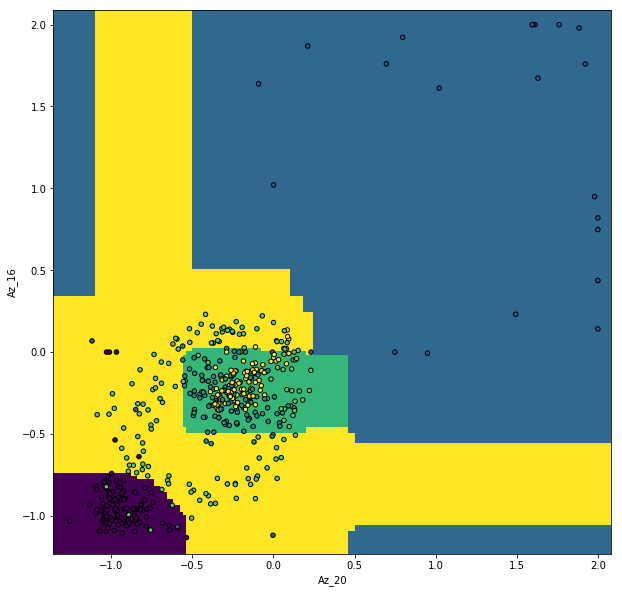

In [43]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAAAA', '#AAAFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#0FF000', '#000FF0'])

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train_reduced[:, 0].min() - 0.1, X_train_reduced[:, 0].max() + 0.1
y_min, y_max = X_train_reduced[:, 1].min() - 0.1, X_train_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_reduced.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z)#, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train-1, edgecolor='k', s=20)#, cmap=cmap_light)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Az_20')
plt.ylabel('Az_16')
plt.show()

In [215]:
y_test

array([1, 4, 1, 4, 4, 1, 4, 3, 3, 4, 5, 4, 3, 5, 4, 3, 5, 3, 4, 5, 4, 2, 4,
       1, 1, 3, 5, 3, 4, 4, 3, 2, 3, 3, 1, 1, 3, 4, 1, 1, 4, 5, 1, 4, 4, 1,
       1, 5, 4, 1, 1, 4, 3, 4, 5, 3, 5, 4, 1, 4, 4, 3, 3, 3, 4, 2, 5, 3, 4,
       3, 4, 4, 3, 2, 4, 5, 4, 4, 3, 3, 1, 5, 1, 4, 1, 1, 4, 3, 4, 1, 1, 2,
       3, 3, 1, 5, 4, 3, 3, 4, 1, 3, 3, 4, 4, 3, 1, 4, 3, 5, 1, 1, 3, 1, 3,
       3, 4, 1, 5, 3, 4, 5, 5, 3, 2, 5, 1, 3, 5, 1, 5, 1, 5, 4, 5, 1, 3, 3,
       5, 3, 5, 5, 1, 5, 3, 3, 1, 1, 4, 3, 4, 4, 4, 5, 4, 4, 4, 1, 3, 2, 4,
       2, 2, 4, 3, 4, 4, 3, 5, 3, 1, 4, 2, 3, 4, 4, 5, 1, 1, 5, 4, 5, 3, 3,
       4, 1, 5, 3, 5, 2, 5, 2, 2, 5, 5, 1, 1, 3, 5, 3, 4, 3, 4, 5, 4, 4, 2,
       5, 4, 1, 5, 5, 1, 1, 4, 3, 1, 3, 3, 3, 3, 3, 3, 3, 4, 5, 4, 4, 2, 3,
       1, 3, 5, 3, 1, 4, 3, 3, 4, 3, 1, 1, 5, 3, 5, 2, 4, 3, 5, 4, 3])

### E ora in produzione!!
<img src="img/rpi.jpg">

In [ ]:
'''
        Detect movements.
		USAGE: python MovementDetector.py
'''
import smbus			#import SMBus module of I2C
import time         
import collections
import numpy as np
import csv
import sys
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import config
import socket


#some MPU6050 Registers and their Address
PWR_MGMT_1   = 0x6B
SMPLRT_DIV   = 0x19
CONFIG       = 0x1A
GYRO_CONFIG  = 0x1B
INT_ENABLE   = 0x38
ACCEL_XOUT_H = 0x3B
ACCEL_YOUT_H = 0x3D
ACCEL_ZOUT_H = 0x3F
GYRO_XOUT_H  = 0x43
GYRO_YOUT_H  = 0x45
GYRO_ZOUT_H  = 0x47


def MPU_Init():
	#write to sample rate register
	bus.write_byte_data(Device_Address, SMPLRT_DIV, 7)
	
	#Write to power management register
	bus.write_byte_data(Device_Address, PWR_MGMT_1, 1)
	
	#Write to Configuration register
	bus.write_byte_data(Device_Address, CONFIG, 0)
	
	#Write to Gyro configuration register
	bus.write_byte_data(Device_Address, GYRO_CONFIG, 24)
	
	#Write to interrupt enable register
	bus.write_byte_data(Device_Address, INT_ENABLE, 1)

def read_raw_data(addr):
	#Accelero and Gyro value are 16-bit
    high = bus.read_byte_data(Device_Address, addr)
    low = bus.read_byte_data(Device_Address, addr+1)
    
    #concatenate higher and lower value
    value = ((high << 8) | low)
        
    #to get signed value from mpu6050
    if(value > 32768):
        value = value - 65536
    return value



bus = smbus.SMBus(1) 	# or bus = smbus.SMBus(0) for older version boards
Device_Address = 0x68   # MPU6050 device address

MPU_Init()

LenFifo = config.LenFifo
Athr = config.Athr
tCycle = config.tCycle
tDelay = config.tDelay
ricorrenze = config.ricorrenze
sogliaRic = config.sogliaRic
minMovRec = config.minMovRec

AxFifo = collections.deque(LenFifo*[0], LenFifo)
AyFifo = collections.deque(LenFifo*[0], LenFifo)
AzFifo = collections.deque(LenFifo*[0], LenFifo)
GxFifo = collections.deque(LenFifo*[0], LenFifo)
GyFifo = collections.deque(LenFifo*[0], LenFifo)
GzFifo = collections.deque(LenFifo*[0], LenFifo)
MvFifo = collections.deque(LenFifo*[0], LenFifo)

#Model training
print 'Training AI model'
n_col = LenFifo * 6 
train_data = pd.read_csv('movements.csv', index_col=0, header=None)
X_train = train_data.iloc[:,0:n_col].values
y_train = train_data.iloc[:,n_col].values

algorithm = RandomForestClassifier(n_estimators=100, random_state=0) #max_depth=10,
algorithm.fit(X_train, y_train)
print 'AI model trained'
print "Inizio client"


host = '192.168.1.192'
port = 1026
countGen = 0

while True:
    #sock.bind((host, port))
    #sock.listen(1)

    #c, add = sock.accept()
    count = 0
    volte = 0 
    while True:
        #print 'Reading Data of Gyroscope and Accelerometer'
        #Read Accelerometer raw value
        acc_x = read_raw_data(ACCEL_XOUT_H)
        acc_y = read_raw_data(ACCEL_YOUT_H)
        acc_z = read_raw_data(ACCEL_ZOUT_H)
	
	    #Read Gyroscope raw value
        gyro_x = read_raw_data(GYRO_XOUT_H)
        gyro_y = read_raw_data(GYRO_YOUT_H)
        gyro_z = read_raw_data(GYRO_ZOUT_H)
	
	    #Full scale range +/- 250 degree/C as per sensitivity scale factor
        Ax = acc_x/16384.0
        Ay = acc_y/16384.0
        Az = acc_z/16384.0

        Gx = gyro_x/131.0
        Gy = gyro_y/131.0
        Gz = gyro_z/131.0

        AxFifo.append(Ax)
        AyFifo.append(Ay)
        AzFifo.append(Az)
        GxFifo.append(Gx)
        GyFifo.append(Gy)
        GzFifo.append(Gz)

        movement_detected = (np.abs(AxFifo[LenFifo-1]-AxFifo[LenFifo-2])>Athr) | (np.abs(AyFifo[LenFifo-1]-AyFifo[LenFifo-2])>Athr) | (np.abs(AzFifo[LenFifo-1]-AzFifo[LenFifo-2])>Athr)

        if movement_detected:
            count += 1
            countGen += 1
            X = np.array(list(AxFifo) + list(AyFifo) + list(AzFifo) + list(GxFifo) + list(GyFifo) + list(GzFifo)).reshape(-1,n_col)
            y_predict = algorithm.predict(X)
            predict_proba = algorithm.predict_proba(X)
            print y_predict
		    #print ('Detected movement %d, probabilities :' % y_predict) + str(predict_proba)
            MvFifo.append(y_predict)
            if (count > minMovRec) and (countGen > LenFifo):
                #print str(MvFifo[LenFifo - 1]) 
                for x in MvFifo:
                    v = x[0] - 1
                    #print v
                    #print ricorrenze
                    ricorrenze[v] += 1
                        
                massimo = max(ricorrenze)
                numMax = ricorrenze.index(massimo)
                if numMax != 5 and massimo >= sogliaRic:
                    toSend = (ricorrenze.index(massimo)) + 1
                    print toSend
                    sock = socket.socket(socket.AF_INET,socket.SOCK_STREAM)    
                    sock.connect((host, port))
                    sock.send(str(toSend))
                    count = 0
                    for i,r in enumerate(ricorrenze):
                        ricorrenze[i] = 0
                    sock.close()
                    time.sleep(tDelay)

                '''else:
                    print "999"
                    c.send("999") '''
                
	    time.sleep(tCycle)
close(csvfile)